In [37]:
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
from nltk.util import ngrams
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yonat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
c:\Users\yonat\AppData\Local\Programs\Python\Python38-32\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [7]:
#read csv file
df = pd.read_csv('cleaned_bad_reviews.csv')
df.head()

,Review,sentiment_score,sentiment
0,walking ten years used variety pedometers time...,-0.003632,neg
1,read instructions setup average female stride ...,-0.018678,neg
2,never used complicated set worthless even says...,-0.231250,neg
3,walked 2 20 minute miles marked walking 16 bou...,-0.033333,neg
4,received realalt 3dtrisport walking 3d pedomet...,-0.075926,neg


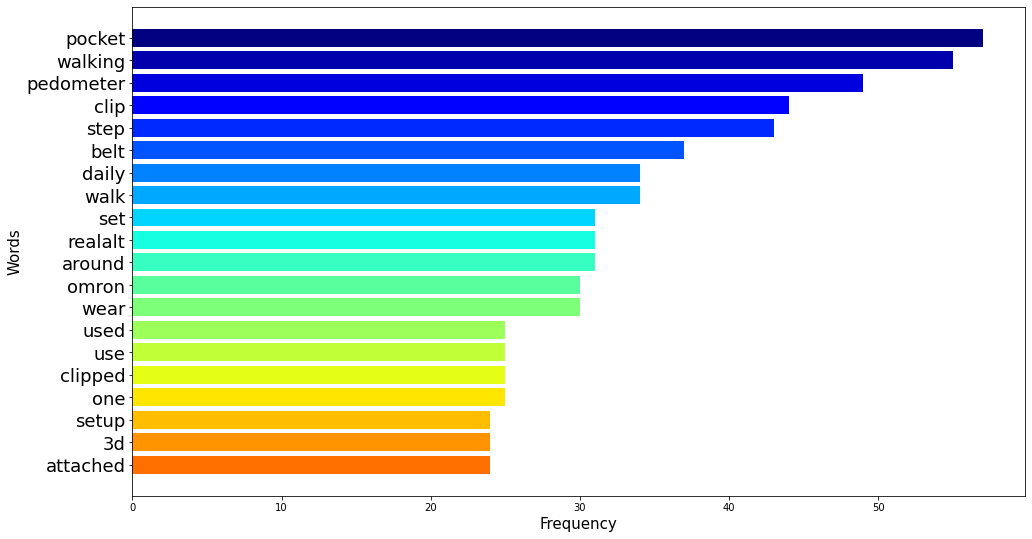

In [11]:
# popular words
words = [x.split() for x in df.Review.values]
from itertools import chain
cx = Counter(list(chain(*words)))
top = 20
most_common = cx.most_common()[1:]
x, y = zip(*most_common[:top])
fig, ax = plt.subplots(1, figsize=(16,9))
ax.barh(range(len(x)), y, color = plt.cm.jet(np.linspace(0, 1, 25)))
ax.invert_yaxis()
ax.set_xlabel('Frequency', fontsize=15)
ax.set_ylabel('Words' , fontsize=15)
ax.set_yticks(np.arange(len(x)))
ax.set_yticklabels(x, fontsize=18)
plt.show()

In [28]:
def extract_ngrams(data, num):
    n_grams = ngrams(word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]


In [50]:
anchors = [str(x) for x in df['Review'].tolist()]
data = ''
data = ' '.join(anchors)
keywords = extract_ngrams(data,10)
keywords

['walking ten years used variety pedometers time period inaccurate pedometer',
 'ten years used variety pedometers time period inaccurate pedometer used',
 'years used variety pedometers time period inaccurate pedometer used yet',
 'used variety pedometers time period inaccurate pedometer used yet omron',
 'variety pedometers time period inaccurate pedometer used yet omron hj321',
 'pedometers time period inaccurate pedometer used yet omron hj321 bit',
 'time period inaccurate pedometer used yet omron hj321 bit dust',
 'period inaccurate pedometer used yet omron hj321 bit dust able',
 'inaccurate pedometer used yet omron hj321 bit dust able get',
 'pedometer used yet omron hj321 bit dust able get another',
 'used yet omron hj321 bit dust able get another think',
 'yet omron hj321 bit dust able get another think discontinued',
 'omron hj321 bit dust able get another think discontinued always',
 'hj321 bit dust able get another think discontinued always walked',
 'bit dust able get anoth

In [51]:
keywords = list(Counter(keywords).most_common(100))

df2 = pd.DataFrame(keywords,columns=["keyword","count"])
df2

,keyword,count
0,walking ten years used variety pedometers time...,6
1,ten years used variety pedometers time period ...,6
2,years used variety pedometers time period inac...,6
3,used variety pedometers time period inaccurate...,6
4,variety pedometers time period inaccurate pedo...,6
...,...,...
95,try clip attach pocket 100 step test still cou...,6
96,clip attach pocket 100 step test still countin...,6
97,attach pocket 100 step test still counting bad...,6
98,pocket 100 step test still counting bad want u...,6


In [52]:
df2['keyword'].to_csv('result.csv', index=False, encoding='utf-8')